In [1]:
import os
%matplotlib inline
!pip install psycopg2
import matplotlib
import pandas.io.sql as psql
import pyodbc
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import psycopg2

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import and_
import sqlalchemy.pool as pool

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# create inspector

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Get a list of column names and types for 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Get a list of column names and types for 'station' table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [14]:
# Calculate the earliest date in the data set
earliest_date = session.query(Measurement.date).order_by(Measurement.date).first()
earliest_date = earliest_date[0]
earliest_date

'2010-01-01'

In [15]:
# Calculate the last date in the data set
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = last_date[0]
last_date

'2017-08-23'

# 1. Precipitation Analysis

In [16]:
# Calculate the date 1 year ago from the last date in the database
query_date = dt.datetime.strptime(last_date, "%Y-%m-%d") - dt.timedelta(days = 365)
query_date.strftime("%Y-%m-%d")

'2016-08-23'

In [17]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, func.avg(Measurement.prcp)]

prcp_data = session.query(*sel).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.date <= last_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
prcp_data

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_DF = pd.DataFrame(prcp_data, columns=['date', 'avg_prcp'])
prcp_DF.set_index('date', inplace=True)


In [19]:
prcp_DF.head()

,avg_prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


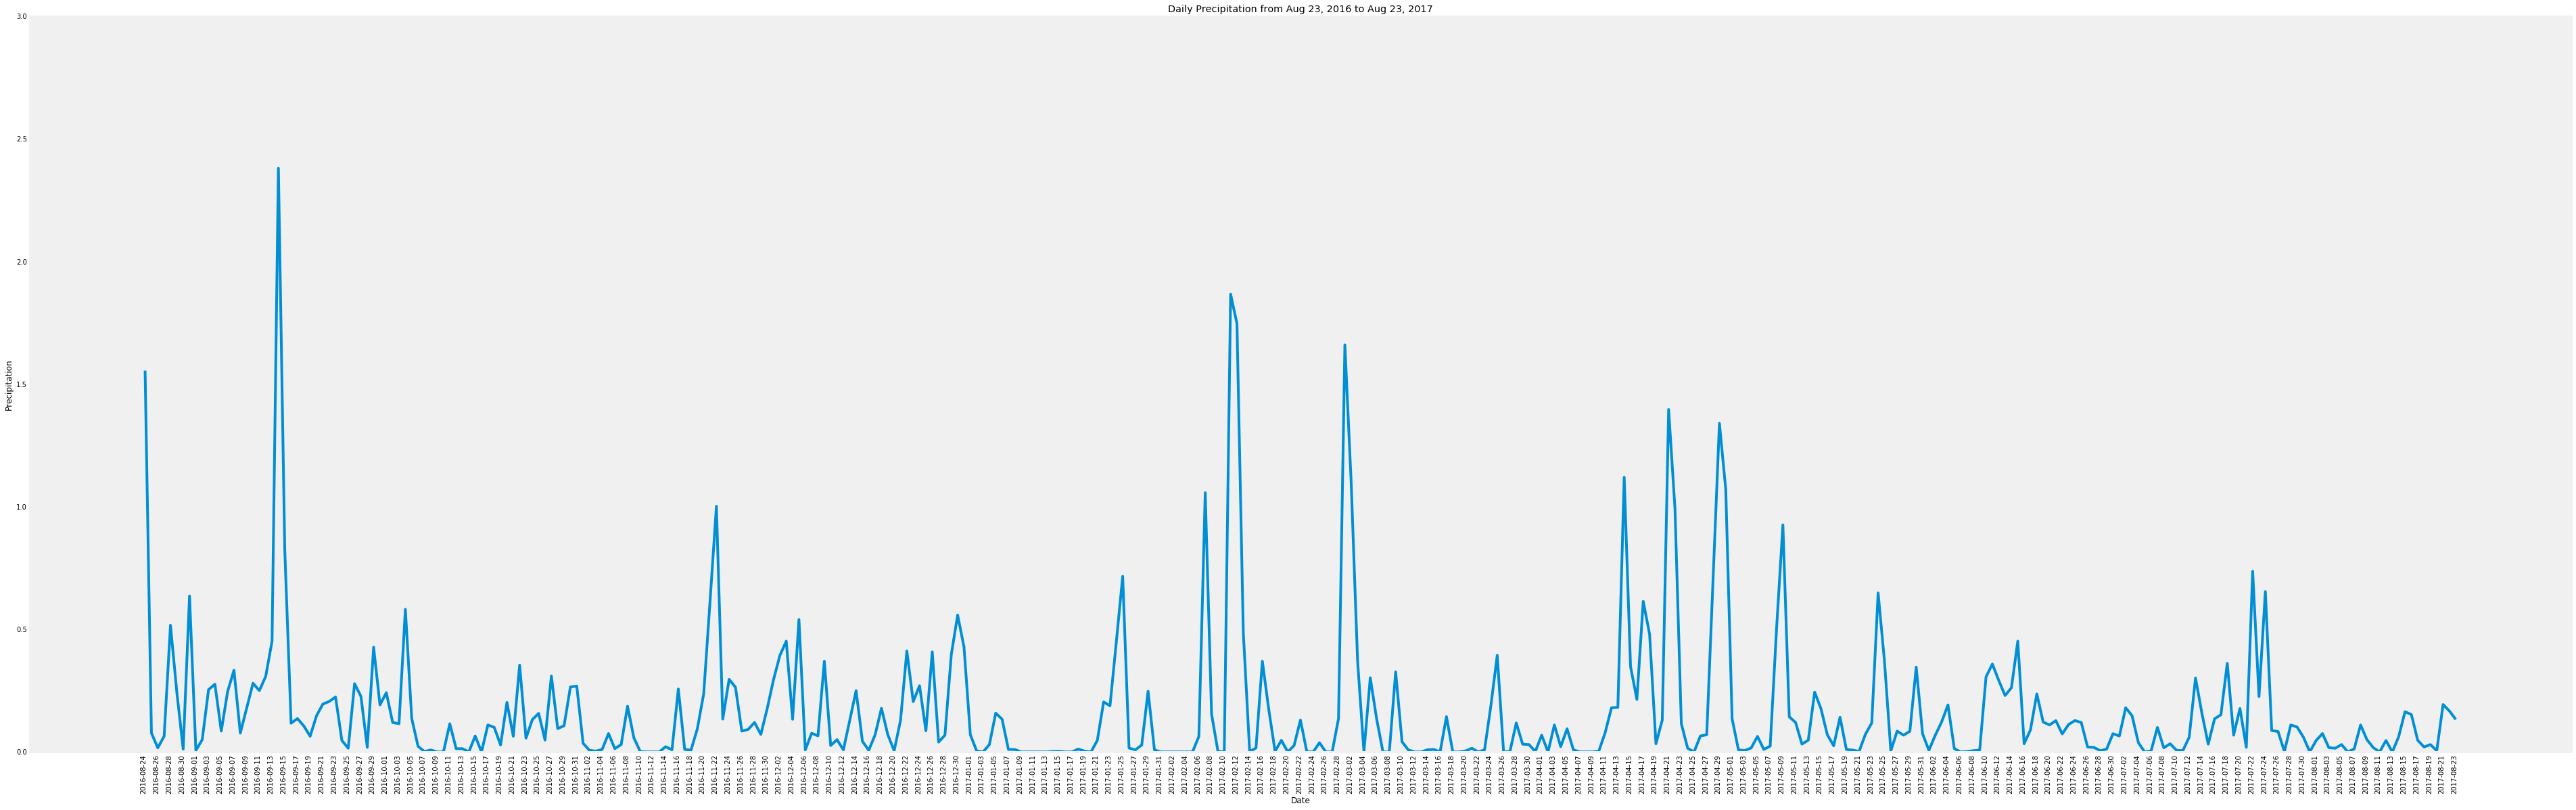

In [20]:
# prcp_DF.plot(kind='bar', x= prcp_DF.index, y=prcp_DF.prcp, color='Blue')

x = prcp_DF.index
y = prcp_DF.avg_prcp

fig, ax = plt.subplots(figsize=(60,20))
ax.plot(x,y)
start, end = ax.get_xlim()
plt.xticks(np.arange(start, end, 2), rotation = 'vertical')
ax.set_ylim([0,3])

plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.title("Daily Precipitation from Aug 23, 2016 to Aug 23, 2017")

plt.grid()

# Save figure as file
try:
    os.mkdir('figure_files')
    plt.savefig(os.path.join('figure_files',"Daily_Prec.png"))
except:
    plt.savefig(os.path.join('figure_files',"Daily_Prec.png"))

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_DF.describe()

,avg_prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# 2. Station Analysis

In [22]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Station).count()
total_stations

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).first()

most_active_station

('USC00519281', 2772)

In [25]:
# lowest temp of most active station
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station[0]).all()   

lowest_temp

[(54.0)]

In [26]:
# highest temp of most active station
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station[0]).all()   

highest_temp

[(85.0)]

In [27]:
# avg temp of most active station
avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station[0]).all()   

avg_temp

[(71.66378066378067)]

In [28]:
# Choose the station with the highest number of temperature observations.

most_tobs_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.tobs))).first()

most_tobs_station

('USC00519281', 2772)

In [29]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_temps = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.date <= last_date).\
    filter(Measurement.station == most_tobs_station[0]).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
last_year_temps

last_year_temps_DF = pd.DataFrame(last_year_temps, columns=['date', 'station', 'tobs'])
last_year_temps_DF

,date,station,tobs
0,2016-08-24,USC00519281,77.0
1,2016-08-25,USC00519281,80.0
2,2016-08-26,USC00519281,80.0
3,2016-08-27,USC00519281,75.0
4,2016-08-28,USC00519281,73.0
...,...,...,...
346,2017-08-14,USC00519281,77.0
347,2017-08-15,USC00519281,77.0
348,2017-08-16,USC00519281,76.0
349,2017-08-17,USC00519281,76.0


In [30]:
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# stationX_tobs = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
#     filter(Measurement.date >= query_date).\
#     filter(Measurement.date <= last_date).\
#     filter(Measurement.station == most_tobs_station[0]).\
#     group_by(Measurement.tobs).\
#     order_by(Measurement.tobs).all()
# stationX_tobs

# stationX_tobs_DF = pd.DataFrame(stationX_tobs, columns=['tobs', 'count_of_tobs'])
# stationX_tobs_DF

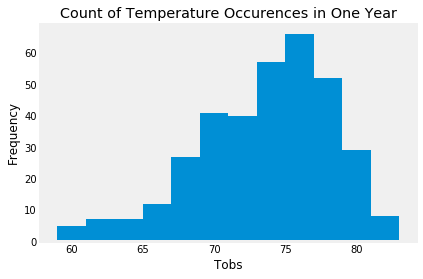

In [35]:
plt.hist(last_year_temps_DF.tobs, bins = 12)

plt.ylabel("Frequency")
plt.xlabel("Tobs")
plt.title("Count of Temperature Occurences in One Year")

plt.grid()

# Save the figure
try:
    os.mkdir('figure_files')
    plt.savefig(os.path.join('figure_files',"Histogram_TempOccurences.png"),dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
except:
    plt.savefig(os.path.join('figure_files',"Histogram_TempOccurences.png"),dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-04-23', '2016-04-30'))

[(68.0, 75.5576923076923, 79.0)]


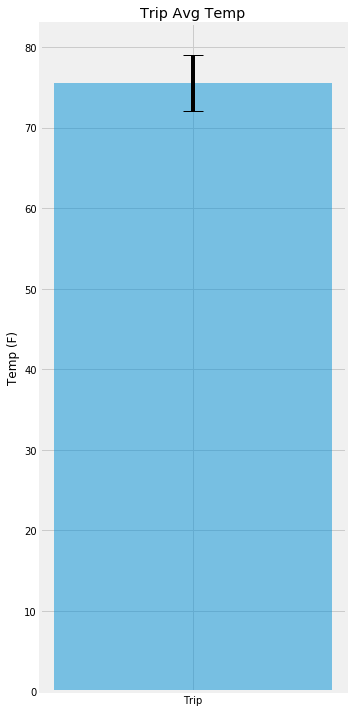

In [46]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

x_value = ['Trip']
y_value = calc_temps('2016-04-23', '2016-04-30')[0][1]
max_temp = calc_temps('2016-04-23', '2016-04-30')[0][2]
min_temp = calc_temps('2016-04-23', '2016-04-30')[0][1]
yerror = (max_temp - min_temp)

fig, ax = plt.subplots(figsize = (5,10))
ax.bar(x_value, y_value,
       yerr=yerror,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

ax.set_ylabel("Temp (F)")
ax.set_title("Trip Avg Temp")

plt.tight_layout()

# Save the figure
try:
    os.mkdir('figure_files')
    plt.savefig(os.path.join('figure_files',"Trip_AvgTemp.png"),dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
except:
    plt.savefig(os.path.join('figure_files',"Trip_AvgTemp.png"),dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

# Display the figure
plt.show()


In [47]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_data = session.query(Measurement.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation).\
    filter(Measurement.date >= '2016-04-23').\
    filter(Measurement.date <= '2016-04-30').\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(desc(func.sum(Measurement.prcp))).all()
trip_data

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  2.3000000000000003,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  0.63,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 0.44, 21.4234, -157.8015, 14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.32999999999999996,
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.3,
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.1, 21.2716, -157.8168, 3.0),
 ('USC00517948', 'PEARL CITY, HI US', None, 21.3934, -157.9751, 11.9)]

In [48]:
# place trip data into dataframe
trip_DF = pd.DataFrame(trip_data, columns=['Station', 'Station Name', 'Total Precipitation', 'Latitude', 'Longitude', 'Elevation'])
trip_DF.set_index('Station', inplace=True)

trip_DF

,Station Name,Total Precipitation,Latitude,Longitude,Elevation
Station,,,,,
USC00516128,"MANOA LYON ARBO 785.2, HI US",2.30,21.33310,-157.80250,152.4
USC00519281,"WAIHEE 837.5, HI US",0.63,21.45167,-157.84889,32.9
USC00513117,"KANEOHE 838.1, HI US",0.44,21.42340,-157.80150,14.6
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.33,21.33556,-157.71139,19.5
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.30,21.52130,-157.83740,7.0
USC00519397,"WAIKIKI 717.2, HI US",0.10,21.27160,-157.81680,3.0
USC00517948,"PEARL CITY, HI US",NaN,21.39340,-157.97510,11.9
